## Observations and Insights 

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_data = combined_data.groupby(["Mouse ID"])
print(f"There are {len(mice_data)} mice")

There are 249 mice


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = combined_data[combined_data.duplicated(["Mouse ID","Timepoint"])]
duplicate_mice_df.head


<bound method NDFrame.head of     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  >

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


# clean_mice_df = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_df)==False]


indexNames = combined_data[combined_data["Mouse ID"] == "g989"].index
 

combined_data.drop(indexNames , inplace=True)

combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = combined_data.groupby(["Mouse ID"])
print(f"There are {len(mice_data)} mice after clean-up")

There are 249 mice after clean-up


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regime_group_mean = combined_data.groupby(["Drug Regimen"]).mean()
regime_group_median = combined_data.groupby(["Drug Regimen"]).median()
regime_group_variance = combined_data.groupby(["Drug Regimen"]).var()
regime_group_std = combined_data.groupby(["Drug Regimen"]).std()
regime_group_sem = combined_data.groupby(["Drug Regimen"]).sem()

# combine_group_mean = mouse_clinical_combine.groupby(["Drug","Timepoint"]).mean()
# combine_group_mean.reset_index(level = None, inplace = True)

tumor_volume_mean = pd.DataFrame(regime_group_mean["Tumor Volume (mm3)"])
# tumor_volume_mean.rename(columns={"Tumor Volume (mm3)": "Tumor Volume (mm3) - Mean"})

tumor_volume_median = pd.DataFrame(regime_group_median["Tumor Volume (mm3)"])

tumor_volume_variance = pd.DataFrame(regime_group_variance["Tumor Volume (mm3)"])

tumor_volume_std = pd.DataFrame(regime_group_std["Tumor Volume (mm3)"])

tumor_volume_sem = pd.DataFrame(regime_group_sem["Tumor Volume (mm3)"])



# tumor_volume_mean.head()
# regime_group_median
# tumor_volume_median.head()
# avg_tumor_volume
# regimen_grouped.head

stats_table_1 = pd.merge(tumor_volume_mean, tumor_volume_median, on="Drug Regimen",suffixes=("_Mean", "_Median"))
stats_table_2 = pd.merge(tumor_volume_variance,tumor_volume_std,on="Drug Regimen",suffixes=("_Var", "_Std"))
stats_table_3 = pd.merge(stats_table_1,stats_table_2,on="Drug Regimen")
final_table = pd.merge(stats_table_3,tumor_volume_sem,on="Drug Regimen")

final_table.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume (mm3)_SEM'}, inplace=True)
final_table

,Tumor Volume (mm3)_Mean,Tumor Volume (mm3)_Median,Tumor Volume (mm3)_Var,Tumor Volume (mm3)_Std,Tumor Volume (mm3)_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
final_table

,Tumor Volume (mm3)_Mean,Tumor Volume (mm3)_Median,Tumor Volume (mm3)_Var,Tumor Volume (mm3)_Std,Tumor Volume (mm3)_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

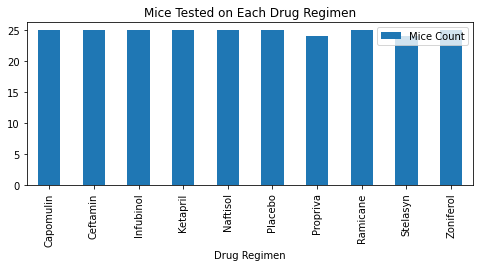

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

mice_count_regimen = combined_data.groupby("Drug Regimen")["Mouse ID"].unique().reset_index()

mice_count_regimen["Mice Count"] = mice_count_regimen["Mouse ID"].str.len()

mice_count_regimen
bar_chart_df = mice_count_regimen[["Drug Regimen","Mice Count"]]


bar_chart_df = bar_chart_df.set_index("Drug Regimen")
bar_chart_df

bar_chart_df.plot(kind="bar", figsize=(8,3))

plt.title("Mice Tested on Each Drug Regimen")

plt.show()


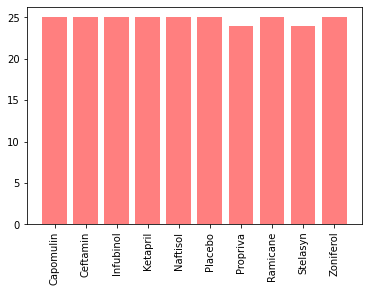

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# x_axis = np.arange(len(mice_count_regimen))
mice_count_bc = mice_count_regimen["Mice Count"]

x_axis = mice_count_regimen["Drug Regimen"]
plt.bar(x_axis, mice_count_bc, color='r', alpha=0.5, align="center")
plt.xticks(rotation=90)

plt.show()


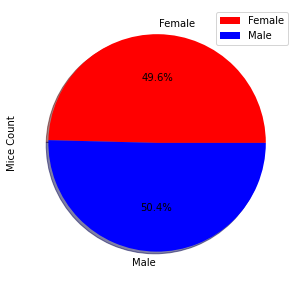

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = combined_data.groupby("Sex")["Mouse ID"].unique().reset_index()

gender_count["Mice Count"] = gender_count["Mouse ID"].str.len()



pie_chart_gender = gender_count[["Sex","Mice Count"]]


pie_chart_gender = pie_chart_gender.set_index("Sex")
# pie_chart_gender
colors = ["red", "blue"]
pie_plot = pie_chart_gender.plot.pie(y='Mice Count',figsize=(5,5), colors = colors, shadow = True, autopct="%1.1f%%")

Text(0.5, 1.0, 'Mice Sex Distribution')

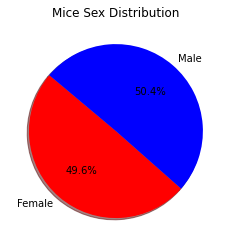

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = combined_data.groupby("Sex")["Mouse ID"].unique().reset_index()

gender_count["Mice Count"] = gender_count["Mouse ID"].str.len()



pie_chart_gender = gender_count[["Sex","Mice Count"]]


pie_chart_gender = pie_chart_gender.set_index("Sex")
pie_chart_gender
counts = pie_chart_gender["Mice Count"]
labels = ["Female", "Male"]
colors = ["red", "blue"]

plt.pie(counts, autopct="%1.1f%%", labels=labels, colors=colors, shadow=True, startangle=140)



plt.title("Mice Sex Distribution")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin




# Start by getting the last (greatest) timepoint for each mouse


final_volume_df = combined_data.sort_values(["Timepoint"], ascending=False)

final_volume_df = final_volume_df.drop_duplicates(subset=['Mouse ID'])
final_volume_df.head

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


<bound method NDFrame.head of      Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
1892     z969     Naftisol    Male           9          30         45   
1344     p136    Zoniferol  Female           5          28         45   
874      g296    Zoniferol  Female          14          29         45   
884      g497     Ketapril    Male          19          28         45   
360      g316    Capomulin  Female          22          22         45   
...       ...          ...     ...         ...         ...        ...   
1583     u153     Ceftamin  Female          11          25          0   
1551     t573     Ceftamin  Female          15          27          0   
938      h428     Ketapril  Female           1          27          0   
1216     n482     Propriva  Female           4          29          0   
1163     l872      Placebo    Male          19          30          0   

      Tumor Volume (mm3)  Metastatic Sites  
1892           73.867845                 4  
134

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles_df = final_volume_df.set_index("Drug Regimen")
quartiles_df_2 = quartiles_df["Tumor Volume (mm3)"].reset_index()

tumor_volumes_last = quartiles_df["Tumor Volume (mm3)"]
quartiles = tumor_volumes_last.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
iqr

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"IQR is {iqr}, lower bound is {lower_bound}, and upper bound is {upper_bound}")

    

IQR is 19.17775725750002, lower bound is 17.109230961249963, and upper bound is 93.82025999125004


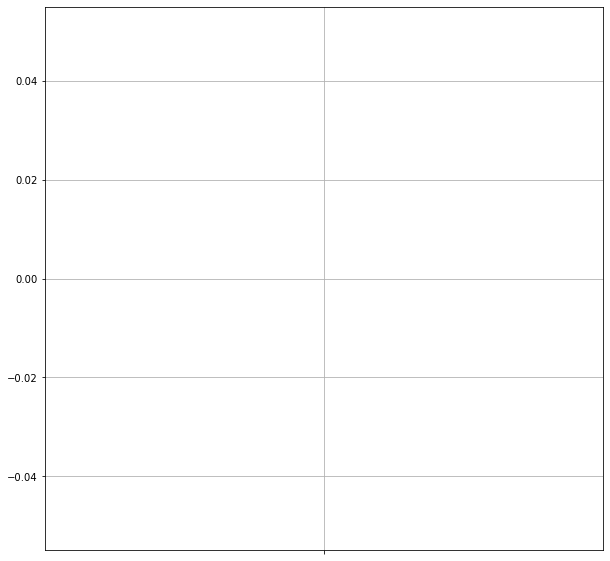

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

drugs_box = quartiles_df_2.groupby("Drug Regimen")["Tumor Volume (mm3)"].unique().reset_index()
drugs_box.head

drugs_box_2 = drugs_box.loc[drugs_box['Drug Regimen'].isin(treatments)]


drugs_box_2 = drugs_box_2.set_index("Drug Regimen")
drugs_box_2
drugs_list  = drugs_box_2["Tumor Volume (mm3)"].tolist() 

# new_frame = pd.DataFrame(data={'Capomulin': [drugs_list[0]], 'Ceftamin': [drugs_list[1]],'Infubinol': [drugs_list[2]],'Ramicane': [drugs_list[3]]})
# new_frame
# new_frame['Capomulin']  = new_frame['Capomulin'].tolist() 
# new_frame

new_frame = pd.DataFrame([('Capomulin',[drugs_list[0]]),
               ('Ceftamin', [drugs_list[1]]),
               ('Infubinol',[drugs_list[2]]),
               ('Ramicane', [drugs_list[3]])],
                columns=['Drug Regimen','Mice']).set_index('Drug Regimen')
drugs_box_2

new_frame['Mice'].apply(lambda x: pd.Series(x)).T.boxplot(figsize=(10,10),rot=45)



## Line and Scatter Plots

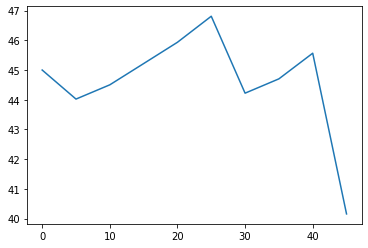

In [45]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_capo = ["g316"]

mouse_capo_data = combined_data.loc[combined_data['Mouse ID'].isin(mouse_capo)]
mouse_capo_data

x_axis_data = mouse_capo_data["Timepoint"]
y_axis_data = mouse_capo_data["Tumor Volume (mm3)"]

plt.plot(x_axis_data, y_axis_data)



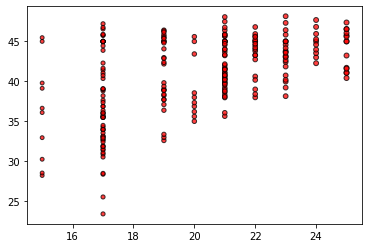

In [58]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Drug_isin = ["Capomulin"]
all_capo_data = combined_data.loc[combined_data['Drug Regimen'].isin(Drug_isin)]
all_capo_data

plt.scatter(all_capo_data["Weight (g)"], all_capo_data["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black", s=all_capo_data["Weight (g)"], alpha=0.75)
# mouse_capo_data

## Correlation and Regression

The correlation between both factors is 0.53


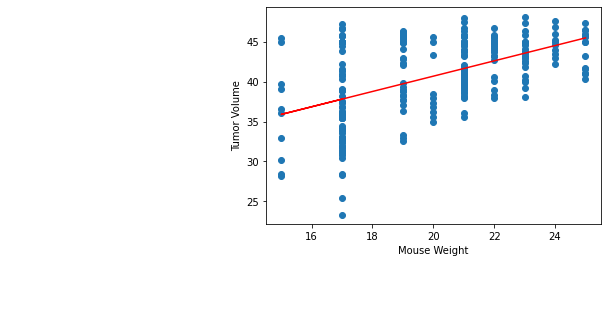

In [63]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capo_weight = all_capo_data["Weight (g)"]
capo_volume = all_capo_data["Tumor Volume (mm3)"]
correlation = st.pearsonr(capo_weight,capo_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(capo_weight, capo_volume)
regress_values = capo_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capo_weight,capo_volume)
plt.plot(capo_weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.show()